In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sys
sys.setrecursionlimit(10000)
constant = 101*101


In [2]:
class Node:
    def __init__(self,i,j,g,h,previous,counter,largerG):
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        self.f = self.g + self.h
        self.h_new = None
        self.previous = previous
        self.counter = counter
        self.isBlocked = False
        # self.priority = self.f
        self.largerG = largerG
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

    def updateFValue(self):
        self.f = (self.g + self.h_new if self.h_new else self.g+self.h)
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

        # self.priority = self.f


In [3]:
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    def addNode(self, node):
        self.heap.append(node)
        self._heapifyUp()
        return self.heap

    def getMinNode(self):
        return self.heap[0]
    
    def popMinNode(self):
        if len(self.heap) == 0:
            return None
        else:
            minEle = self.heap[0]
            self.heap[0] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDown()
            return minEle

    def removeNode(self, node):
        z = search(Node)
        if z:
            removed = self.heap[z]
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            return removed
    
    def upsert(self,oldNode,newNode):
        z = self.search(oldNode)
        if z:
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            self.addNode(newNode)
            return self.heap
        else:
            self.addNode(newNode)
            return self.heap
        
    def search(self, node):
        heap = self.heap
        for x in range(0,len(heap)):
            if self.heap[x].i == node.i and self.heap[x].j == node.j:
                return x
                
    def _heapifyUpInd(self, i):
        heap = self.heap
        size = i
        if len(heap) == 1 :
            return heap
        else:
            while size//2 > 0:
                parent = (size)//2 - 1
                curLast = size-1
                if heap[curLast].priority < heap[parent].priority:
                    swpNode = heap[curLast]
                    heap[curLast] = heap[parent]
                    heap[parent] = swpNode
                size = size//2
            return heap

    def _heapifyUp(self):
        self._heapifyUpInd(len(self.heap))
    
    def _heapifyDownInd(self,ind):
        size = len(self.heap)
        curr = ind
        while (curr+1)*2 <= size:
            minInd = self._nextMinNode(curr)      
            if self.heap[minInd].priority < self.heap[curr].priority:
                swpNode = self.heap[minInd]
                self.heap[minInd] = self.heap[curr]
                self.heap[curr] = swpNode
            curr = minInd
        return self.heap

    def _heapifyDown(self):
        self._heapifyDownInd(0)

    def _nextMinNode(self, index):
        if (index+1)*2 + 1 > len(self.heap):
            return index*2 + 1 
        else:
            if self.heap[index*2 + 1].priority < self.heap[index*2 + 2].priority:
                return index*2 + 1
            else:
                return index*2 + 2
    
    def printHeap(self):
        heap = self.heap
        for x in range(0,len(heap)):
            print("i-",heap[x].i,"j-",heap[x].j,"f-",heap[x].f, "p-",heap[x].priority)
        
    def size(self):
        return len(self.heap)


In [4]:
def generate_random_matrix(input,visited,i,j):
    visited[i][j] = 1
    input[i][j] = 1

    if  j + 1 < len(input) and input[i][j+1] == 0: 
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j+1)
        else:
            visited[i][j+1] = 1
            input[i][j+1] = -1
      
    if  j - 1 >= 0 and input[i][j-1] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j-1)
        else:
            visited[i][j-1] = 1
            input[i][j-1] = -1

    if i -1 >=0 and input[i-1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i-1,j)
        else:
            visited[i-1][j] = 1
            input[i-1][j] = -1

    if i + 1 < len(input) and input[i+1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i+1,j)
        else:
            visited[i+1][j] = 1
            input[i+1][j] = -1

def get_rand_value():
    rand_value = random.randint(0,9)
    if rand_value in [0,2]:
        return -1
    else:
        return 1

def get_unvisited_indices(visited):
    for i in range(0,len(visited)):
        for j in range(0,len(visited)):
            if visited[i][j] == 0:
                return i,j
    return -1,-1


In [5]:
def updateCounter(i,j,nodes,counter):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes) and nodes[i][j].counter != counter:
        nodes[i][j].counter = counter
        nodes[i][j].g = sys.maxsize - 1000
        nodes[i][j].updateFValue()
        # if nodes[i][j].h_new != None:
        #     nodes[i][j].f = nodes[i][j].g + nodes[i][j].h_new
        # else:
        #     nodes[i][j].f = nodes[i][j].g + nodes[i][j].h
        nodes[i][j].previous = None
    


def addValidNeighbors(open_list, nodes, current_node, counter):
    i = current_node.i
    j = current_node.j
    updateCounter(i - 1,j,nodes,counter)
    if i - 1 >= 0 and current_node.g + 1 < nodes[i - 1][j].g and nodes[i - 1][j].isBlocked == False:
        nodes[i - 1][j].g = current_node.g + 1
        nodes[i - 1][j].updateFValue()
        nodes[i - 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i-1][j],nodes[i-1][j])
    
    updateCounter(i + 1,j,nodes,counter)
    if i + 1 < len(maze) and current_node.g + 1 < nodes[i + 1][j].g and nodes[i + 1][j].isBlocked == False:
        nodes[i + 1][j].g = current_node.g + 1
        nodes[i + 1][j].updateFValue()
        nodes[i + 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i+1][j],nodes[i+1][j])

    updateCounter(i,j - 1,nodes,counter)
    if j - 1 >= 0 and current_node.g + 1 < nodes[i][j - 1].g and nodes[i][j - 1].isBlocked == False:
        nodes[i][j - 1].g = current_node.g + 1
        nodes[i][j-1].updateFValue()
        nodes[i][j - 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j-1],nodes[i][j-1])

    updateCounter(i,j + 1,nodes,counter)
    if j + 1 < len(maze) and current_node.g + 1 < nodes[i][j + 1].g and nodes[i][j + 1].isBlocked == False:
        nodes[i][j + 1].g = current_node.g + 1
        nodes[i][j+1].updateFValue()
        nodes[i][j + 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j+1],nodes[i][j+1])


def computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes):
    
    while open_list.size() > 0:   
        current_node = open_list.popMinNode()
        expanded_nodes.append(current_node)
#         print('current node',current_node.i,current_node.j)
        if nodes[goal_node.i][goal_node.j].priority > current_node.priority:
            addValidNeighbors(open_list,nodes, current_node, counter)
        else:
#             print('Goal node is reached')
            return True
    return False

def updateIsBlocked(nodes,i,j,value):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes):
        nodes[i][j].isBlocked = value

def updateBlockedNeighbors(node,nodes):
    i = node.i
    j = node.j
    if i-1 >= 0 and maze[i-1][j] == -1:
        nodes[i-1][j].isBlocked = True
    if j-1 >= 0 and maze[i][j-1] == -1:
        nodes[i][j-1].isBlocked = True
    if i+1 < len(nodes) and maze[i+1][j] == -1:
        nodes[i+1][j].isBlocked = True
    if j+1 < len(nodes) and maze[i][j+1] == -1:
        nodes[i][j+1].isBlocked = True


def traverseNodes(start_node,goal_node,maze,nodes,backward):
    # generate_dup_maze(goal_node,maze,current_node)
    # Need to add logic to see we have to open the adjacent nodes when the agent
    # is travelling

    node = goal_node
    node_list = list()
    path_visualization_matrix = [0] * len(maze)
    distance_from_goal = 0
    for i in range(0,size):
        path_visualization_matrix[i] = [0] * len(maze)

    while node != start_node:
#             print('traversing nodes in reverse order ',node.i,node.j)
            path_visualization_matrix[node.i][node.j] = 1        
            node_list.append(node)
            old_node = node
            node = node.previous
            old_node.previous = None
            distance_from_goal = distance_from_goal + 1
    
    path_visualization_matrix[node.i][node.j] = 1
#     showMaze(path_visualization_matrix,1)
    node_list.append(node)
    if backward:
        node_list.reverse()
#     print('traversing nodes in reverse order ',node.i,node.j)    
    previous_node = node_list.pop()
    maze[previous_node.i][previous_node.j] = 2
        
    while len(node_list) > 0:
        current_node = node_list.pop()
#         print('traversing nodes ',current_node.i,current_node.j)
        
        if maze[current_node.i][current_node.j] == -1:
#             print('Blocked at node ',previous_node.i,previous_node.j)
            current_node = previous_node
            break
        else:
            updateBlockedNeighbors(current_node,nodes)
            maze[current_node.i][current_node.j] = 2
            current_node.previous = previous_node
            previous_node = current_node
#     showMaze(maze,1)
    return distance_from_goal,current_node

def updateHNew(expanded_nodes,distance_from_destination):
    for node in expanded_nodes:
        if distance_from_destination != None:
            node.h_new = distance_from_destination - node.g
        else:
            node.h_new = None
            
def AStarSearchBackwards(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        # maze[current_node.i][current_node.j] = 2
        updateBlockedNeighbors(current_node,nodes)
        goal_node.g = 0
        goal_node.updateFValue()
        goal_node.counter = counter
        i = goal_node.i
        j = goal_node.j
        if i - 1 >= 0 and nodes[i - 1][j].isBlocked == False:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = goal_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and nodes[i + 1][j].isBlocked == False:
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = goal_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and nodes[i][j - 1].isBlocked == False:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = goal_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and nodes[i][j + 1].isBlocked == False:
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = goal_node
            open_list.addNode(nodes[i][j+1])

        current_node.g = sys.maxsize - 1000
        nodes[current_node.i][current_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,current_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            print('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(goal_node,current_node,maze,nodes,True)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
#         print('new current node is',current_node.i,current_node.j)
#     print('Total number of expanded nodes in the search process ',total_expanded_nodes)
    return total_expanded_nodes, can_reach

def AStarSearch(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        maze[current_node.i][current_node.j] = 2
        current_node.g = 0
        current_node.updateFValue()
        current_node.counter = counter
        i = current_node.i
        j = current_node.j
        if i - 1 >= 0 and maze[i - 1][j] == -1:
            updateIsBlocked(nodes,i - 1,j,True)
        elif i - 1 >= 0:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = current_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and maze[i + 1][j] == -1:
            updateIsBlocked(nodes,i + 1,j,True)
        elif i + 1 < len(maze):
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = current_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and maze[i][j - 1] == -1:
            updateIsBlocked(nodes,i,j - 1,True)
        elif j - 1 >= 0:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = current_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and maze[i][j + 1] == -1:
            updateIsBlocked(nodes,i,j + 1,True)
        elif j + 1 < len(maze):
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = current_node
            open_list.addNode(nodes[i][j+1])

        goal_node.g = sys.maxsize - 1000
        nodes[goal_node.i][goal_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            print('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(current_node,goal_node,maze,nodes,False)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
#         print('new current node is',current_node.i,current_node.j)
#     print('Total number of expanded nodes in the search process ',total_expanded_nodes)
    return total_expanded_nodes, can_reach


In [6]:
def showMaze(maze, show):
    if show:
        maze = np.array(maze)
        plt.imshow(maze)
        # plt.gca().axes.get_yaxis().set_visible(False)
        # plt.gca().axes.get_xaxis().set_visible(False)
        locator = matplotlib.ticker.MultipleLocator(5)
        plt.gca().yaxis.set_major_locator(locator)
        formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.show()
        
def validMazeCell(maze, validCellsOnly):
    size = len(maze)
    if validCellsOnly:
        while True:
            i = random.randint(0,size - 1)
            j = random.randint(0,size - 1)
            if maze[i][j] == 1:
                break
    else:
        i = random.randint(0,size - 1)
        j = random.randint(0,size - 1)
    return i,j

def validEndToEnd(maze):
    maze[0][0] = 1
    maze[100][100] = 1
    return maze

count 1
cannot reach destination


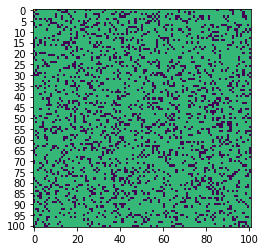

cannot reach destination
count 2


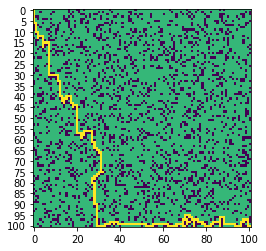

count 3


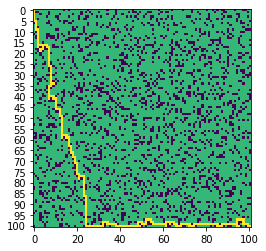

count 4


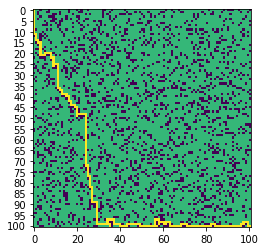

count 5


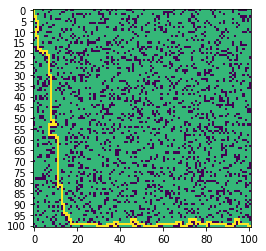

count 6


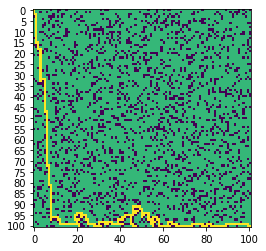

count 7


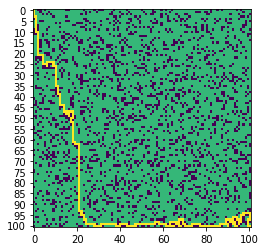

count 8
cannot reach destination


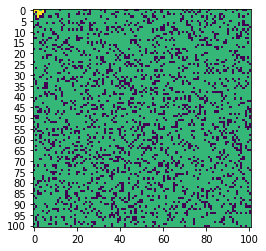

cannot reach destination
count 9
cannot reach destination


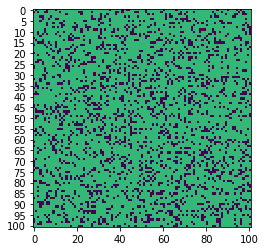

cannot reach destination
count 10


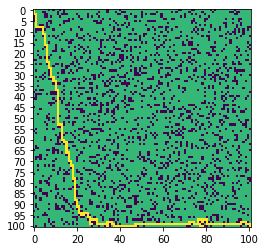

count 11


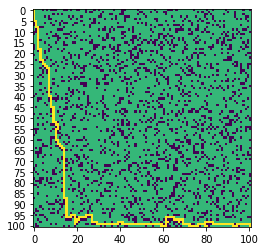

count 12
cannot reach destination


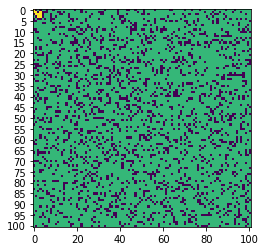

cannot reach destination
count 13


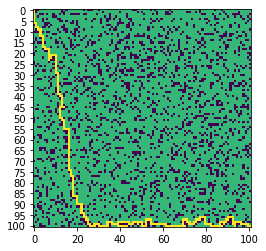

count 14


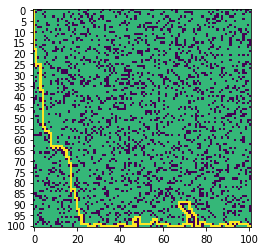

count 15


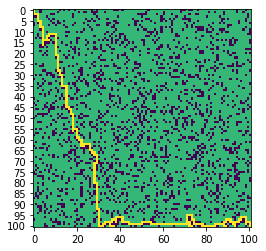

count 16


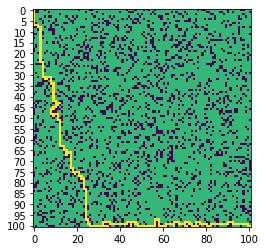

count 17


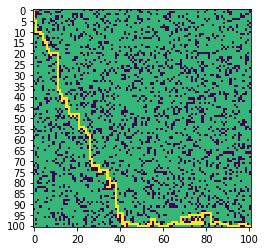

count 18


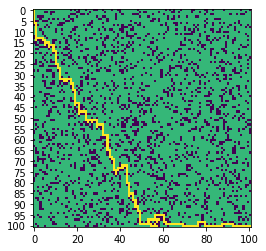

count 19


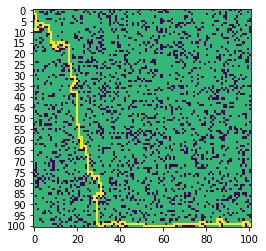

count 20


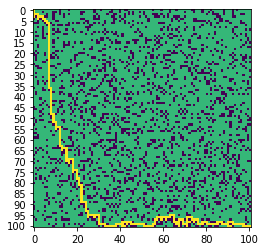

count 21
cannot reach destination


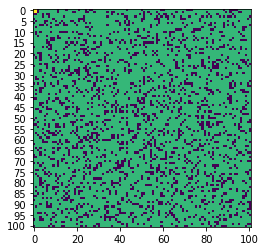

cannot reach destination
count 22


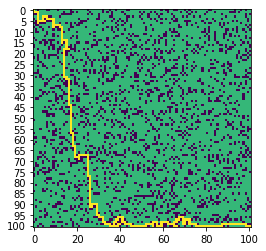

count 23
cannot reach destination


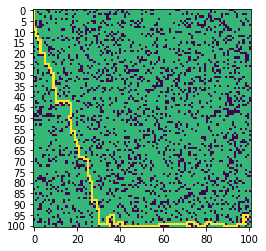

cannot reach destination
count 24


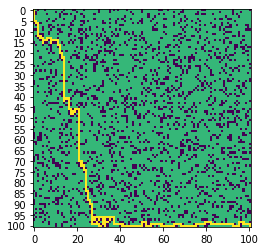

count 25


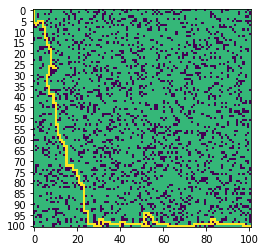

count 26
cannot reach destination


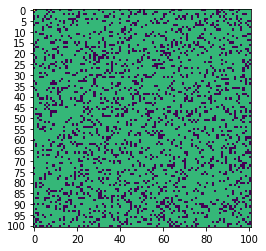

cannot reach destination
count 27
cannot reach destination


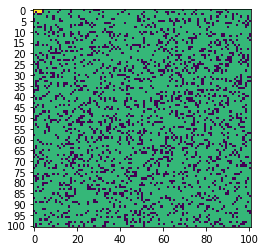

cannot reach destination
count 28


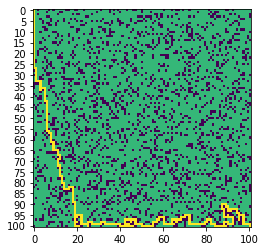

count 29
cannot reach destination


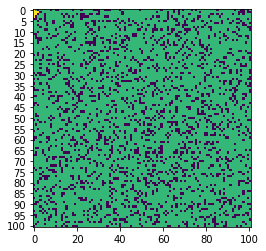

cannot reach destination
count 30


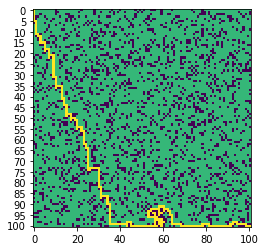

count 31


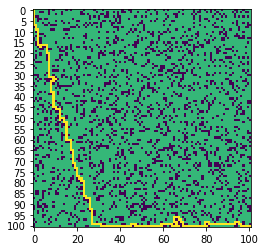

count 32


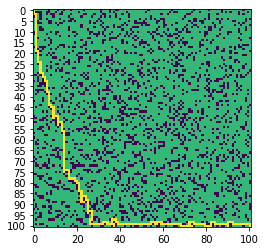

count 33


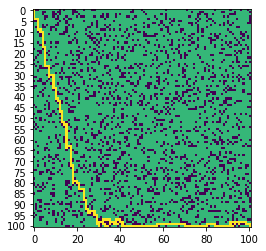

count 34


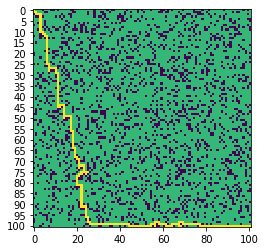

count 35


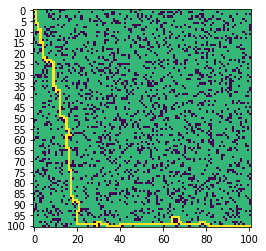

count 36


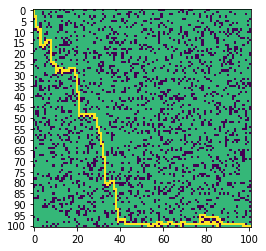

count 37


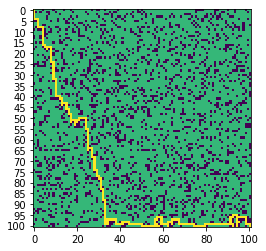

count 38


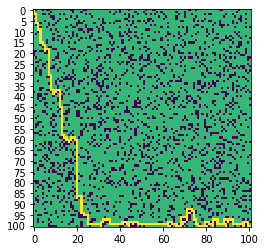

count 39
cannot reach destination


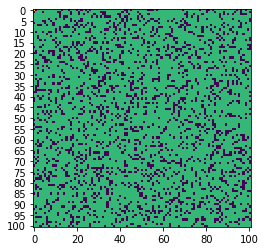

cannot reach destination
count 40
cannot reach destination


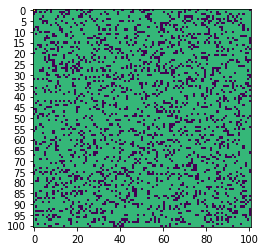

cannot reach destination
count 41


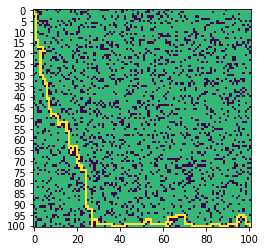

count 42


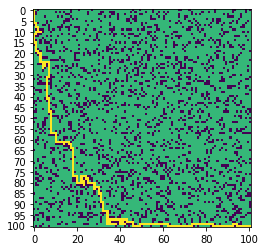

count 43


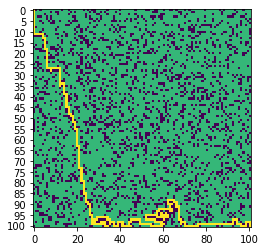

count 44


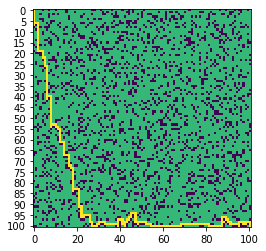

count 45


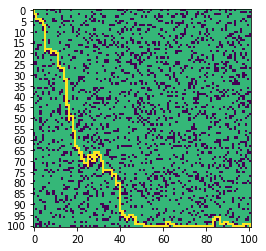

count 46


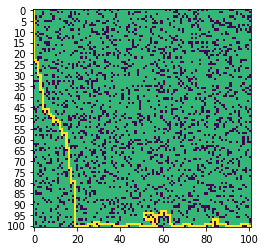

count 47


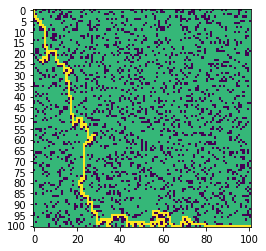

count 48


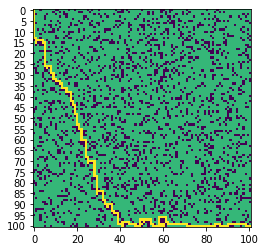

count 49


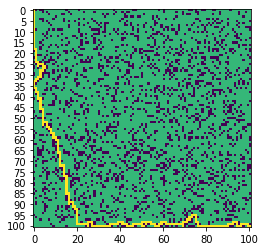

count 50


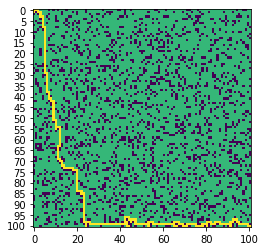

expanded_nodes_length_1 =  [170151, 136892, 153576, 129639, 65776, 141168, 132017, 115222, 147151, 84361, 175420, 143580, 170391, 178359, 218048, 105315, 172188, 141197, 166948, 89225, 146112, 145805, 106235, 127567, 146860, 117520, 178096, 159724, 123239, 151716, 188702, 154451, 99803, 175618, 90924, 232720, 161962, 146482, 117009]
expanded_nodes_length_2 =  [152886, 145234, 169616, 127409, 68983, 124478, 227836, 109694, 117192, 82413, 165483, 104165, 151071, 180806, 185808, 149980, 163566, 158849, 190014, 97562, 198791, 145590, 125778, 148562, 190226, 115974, 184235, 147527, 136750, 125702, 181582, 164598, 122882, 121185, 99872, 207827, 117999, 107822, 117904]


/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:93: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:94: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


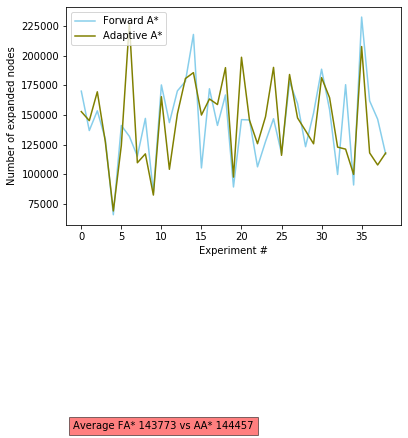

In [7]:
# adaptive vs forward a*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,50):
    print( 'count', k+1)
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size
    
#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
#     print(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
#     print(maze)
    showMaze(maze,1)


    open_list = MinHeap()
#     print(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = True
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = True
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
print('expanded_nodes_length_2 = ',expanded_nodes_length_2)

avgForwardA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
avgAdaptiveA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

# print('Average FA*', avgForwardA, 'vs AA*', avgAdaptiveA )

import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Adaptive A*')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')
plt.legend(['Forward A*', 'Adaptive A*'], loc='upper left')

txt_string = 'Average FA* ' + str(avgForwardA) +' vs AA* ' + str(avgAdaptiveA)

plt.text(-1, -115000, txt_string, bbox=dict(facecolor='red', alpha=0.5))

plt.show()




In [8]:

# import numpy as np
# import pandas as pd

# df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
# df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
# plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
# plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Backward A*')
# plt.xlabel('Experiment #')
# plt.ylabel('Number of expanded nodes')
# plt.legend(['Repeated Forward A*', 'Repeated Backward A*'], loc='upper left')

# txt_string = 'Average RFA* ' + str(RFA) +' vs RBA* ' + str(RBA)

# plt.text(-1, -125000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

# plt.show()

count 1


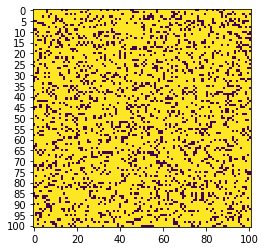

count 2


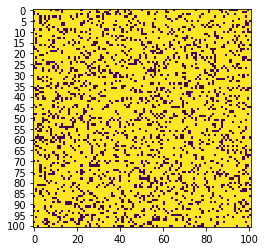

count 3


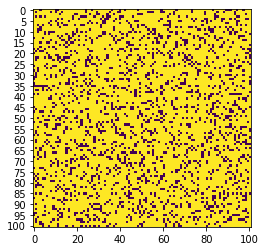

count 4


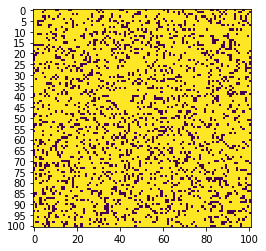

count 5


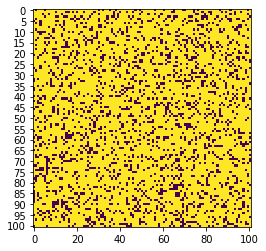

count 6


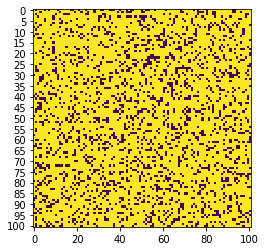

count 7


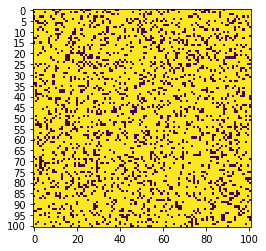

count 8


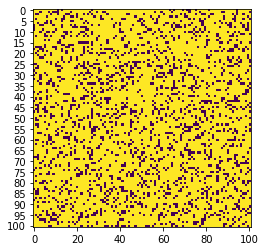

count 9


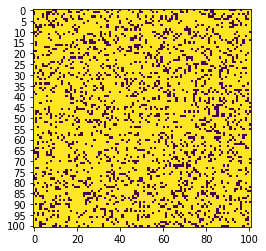

count 10


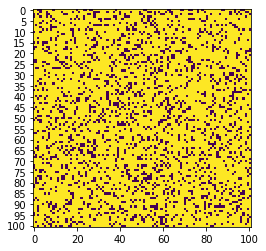

count 11


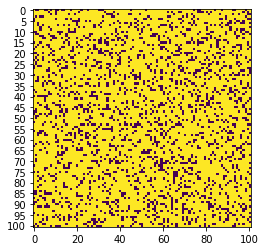

count 12


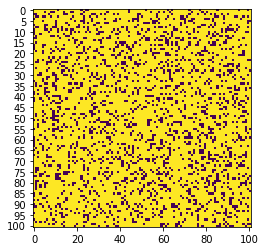

cannot reach destination
cannot reach destination
count 13


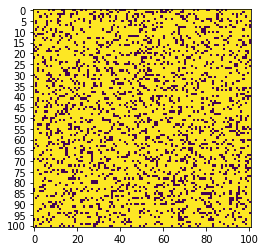

count 14


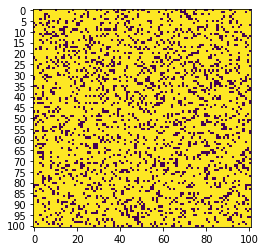

count 15


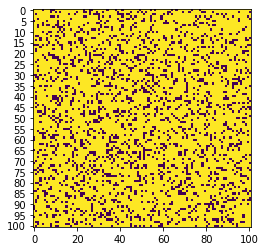

count 16


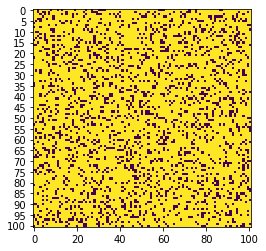

cannot reach destination
cannot reach destination
count 17


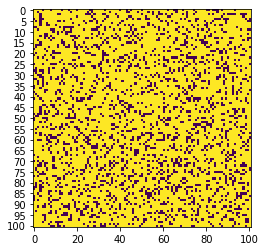

count 18


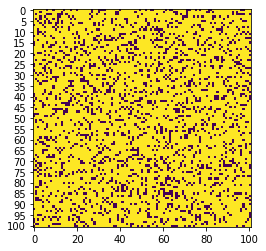

count 19


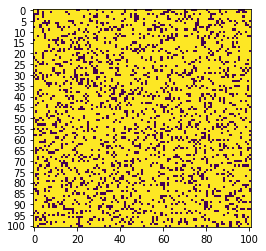

cannot reach destination
cannot reach destination
count 20


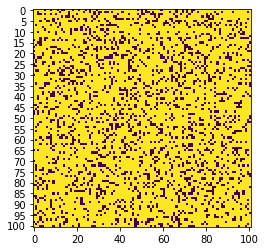

count 21


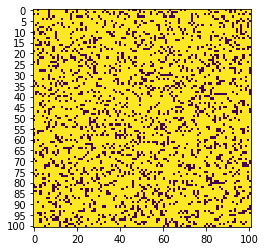

count 22


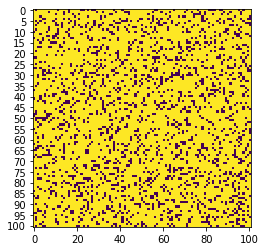

count 23


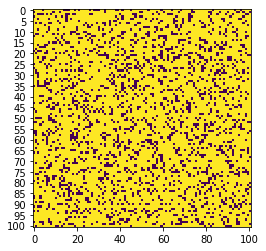

count 24


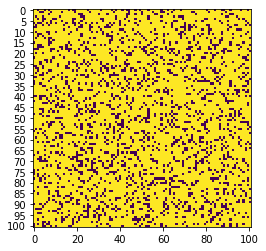

count 25


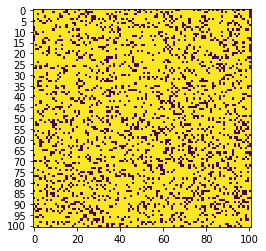

count 26


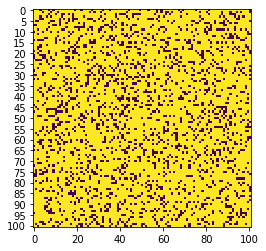

count 27


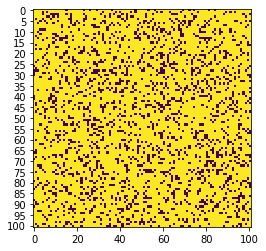

count 28


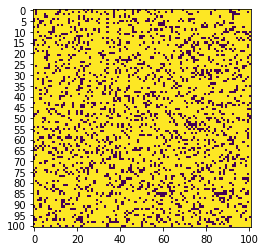

count 29


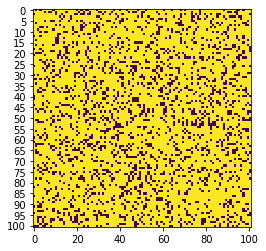

count 30


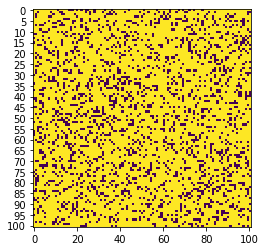

count 31


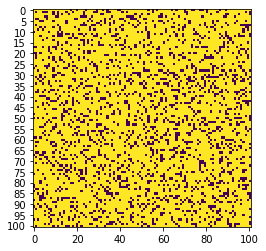

count 32


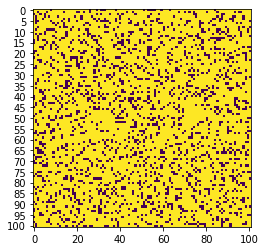

count 33


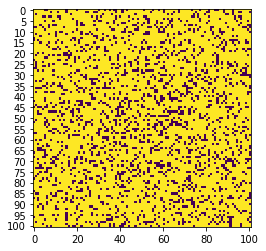

count 34


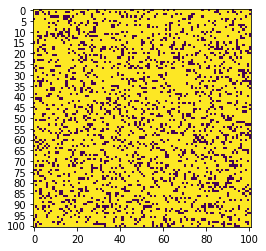

count 35


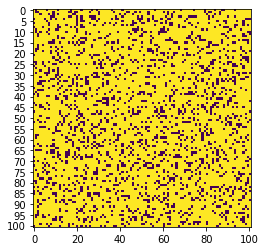

count 36


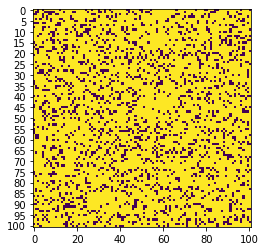

cannot reach destination
cannot reach destination
count 37


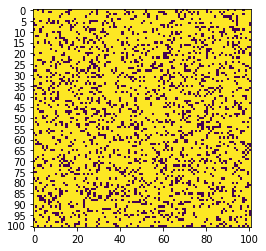

count 38


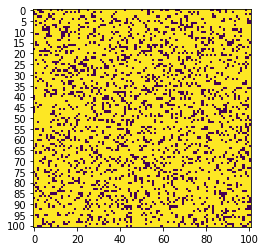

cannot reach destination
cannot reach destination
count 39


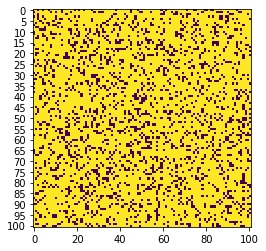

count 40


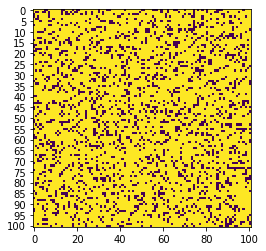

count 41


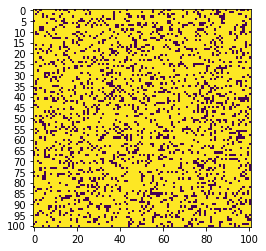

count 42


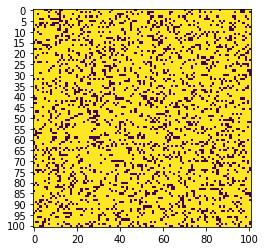

count 43


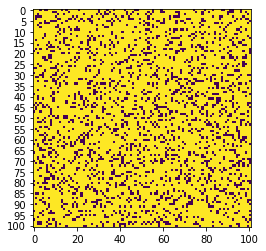

count 44


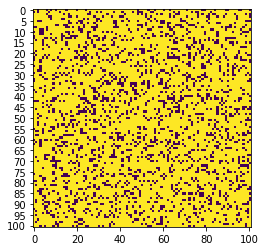

count 45


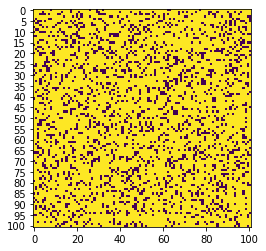

count 46


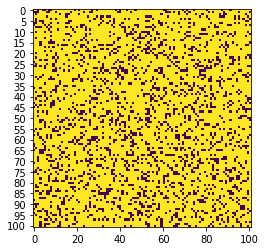

cannot reach destination
cannot reach destination
count 47


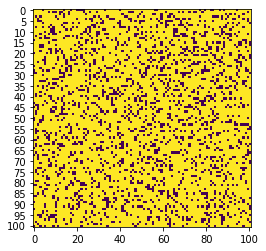

count 48


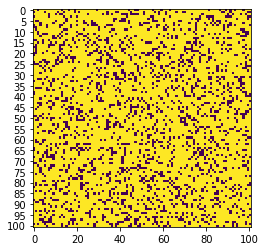

count 49


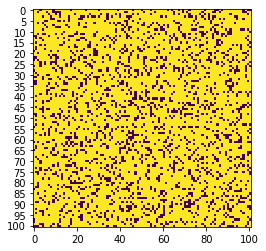

cannot reach destination
cannot reach destination
count 50


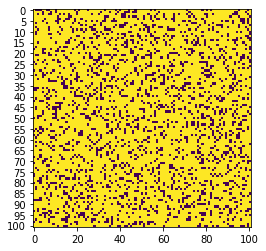

expanded_nodes_length_1 =  [185026, 103913, 137053, 157500, 177709, 159721, 154549, 110635, 130256, 123883, 195542, 150161, 131487, 144367, 128708, 118581, 181087, 201134, 129650, 105894, 167918, 147218, 181184, 95094, 100717, 198068, 94656, 151886, 135366, 125307, 68344, 128262, 174132, 122693, 162290, 160294, 148330, 106300, 73283, 132206, 96073, 193274, 131767]
expanded_nodes_length_2 =  [214628, 169630, 168688, 190417, 213937, 170606, 169730, 130927, 154333, 101513, 203495, 171908, 167088, 189857, 159534, 150989, 179860, 165526, 114382, 147549, 167766, 178192, 185970, 100185, 111323, 188450, 117095, 186189, 154988, 150935, 118288, 208079, 153520, 144313, 242518, 137580, 206533, 150777, 100770, 158125, 106159, 180532, 127333]


/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:92: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


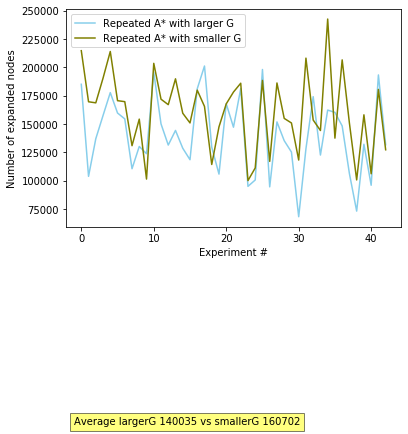

largerG* 140035 vs smalletG 160702


In [9]:
#  largerG vs smallerG
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,50):
    print( 'count', k+1)
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size

#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
#     print(maze)
    
    showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
#     print(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
#     print(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = False
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = False
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
print('expanded_nodes_length_2 = ',expanded_nodes_length_2)

largerG = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
smallerG = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Repeated A* with larger G')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Repeated A* with smaller G')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')


labels = ['Repeated A* with larger G', 'Repeated A* with smaller G']
plt.legend(labels, loc='upper left')

txt_string = 'Average largerG ' + str(largerG) +' vs smallerG ' + str(smallerG)

plt.text(-1, -115000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()

print('largerG*', largerG, 'vs smalletG', smallerG )


count 1


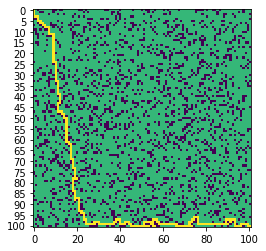

count 2


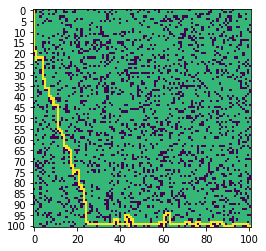

count 3


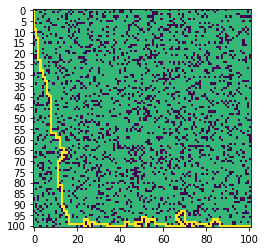

count 4


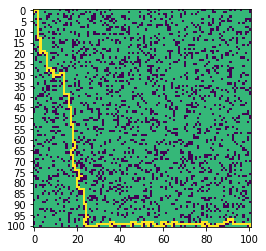

count 5


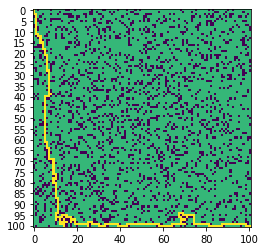

count 6


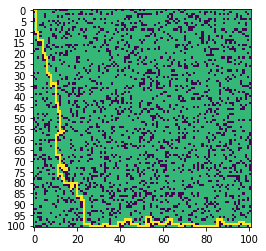

count 7


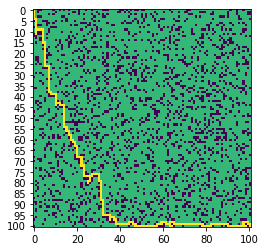

count 8


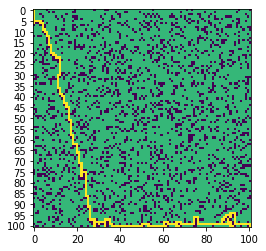

count 9


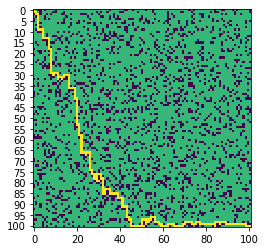

count 10
cannot reach destination


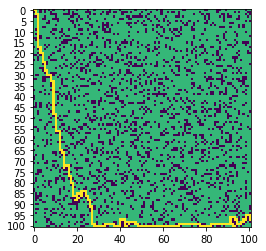

cannot reach destination
count 11


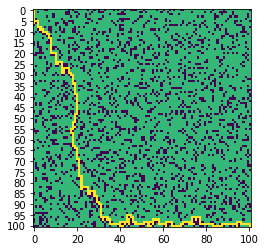

count 12


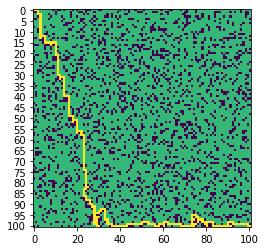

count 13


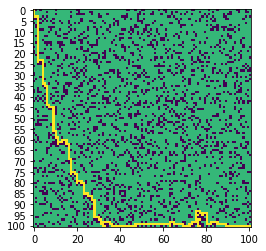

count 14


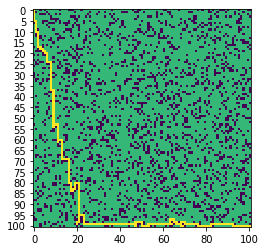

count 15


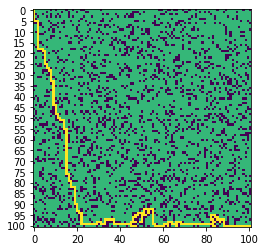

count 16


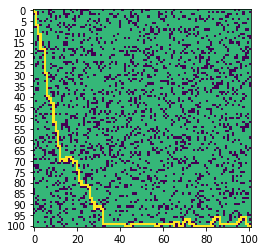

count 17


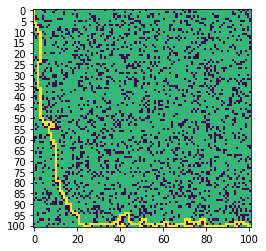

count 18


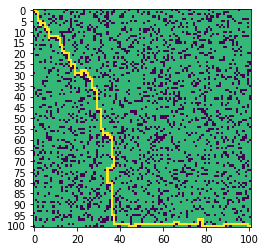

count 19


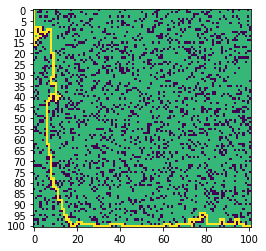

count 20


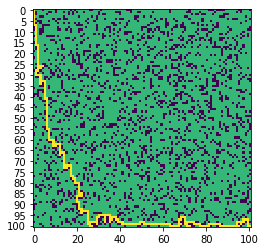

count 21


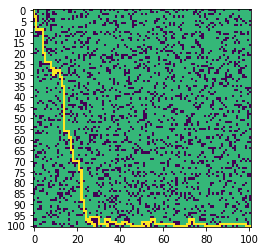

count 22


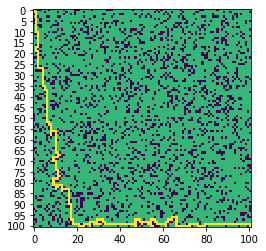

count 23


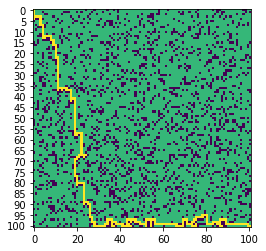

count 24


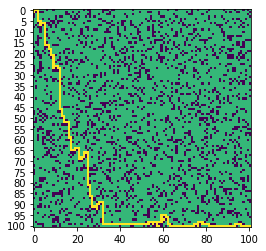

count 25
cannot reach destination


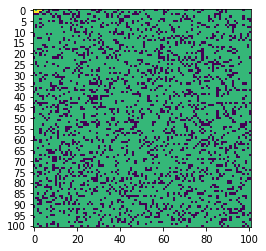

cannot reach destination
count 26


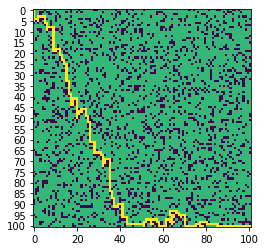

count 27


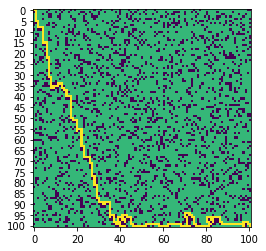

count 28


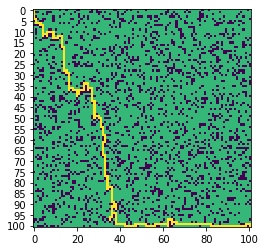

count 29
cannot reach destination


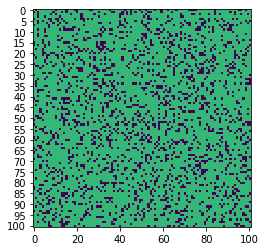

cannot reach destination
count 30


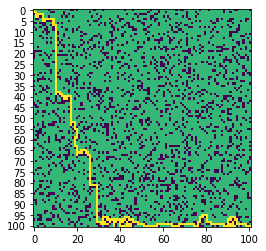

count 31


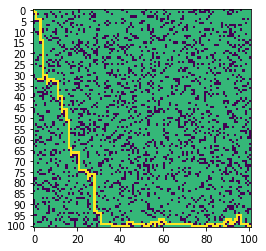

count 32
cannot reach destination


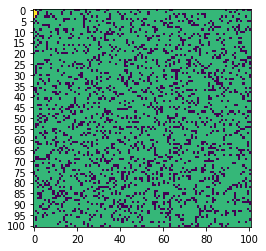

cannot reach destination
count 33
cannot reach destination


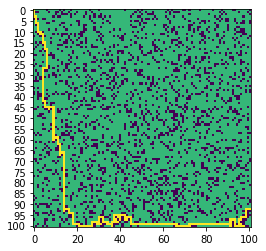

cannot reach destination
count 34


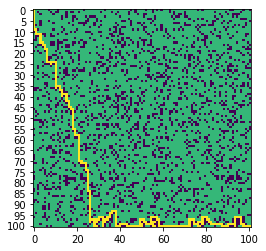

count 35


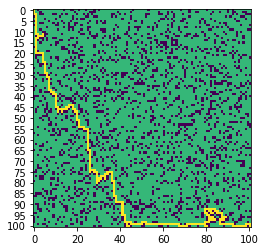

count 36
cannot reach destination


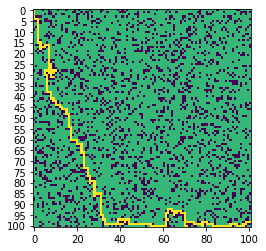

cannot reach destination
count 37


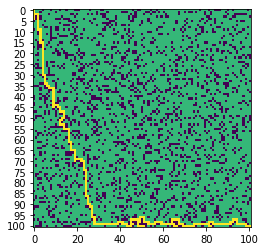

count 38


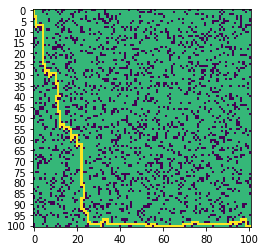

count 39


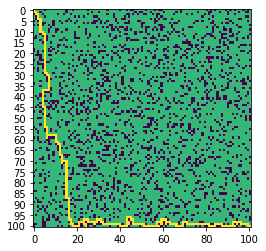

count 40


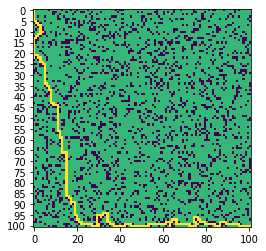

count 41


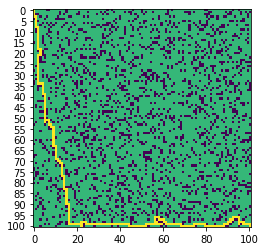

count 42


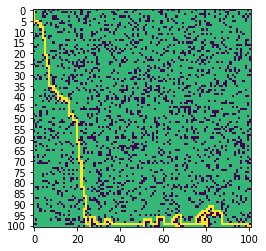

count 43


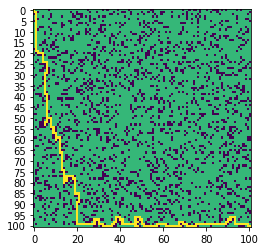

count 44
cannot reach destination


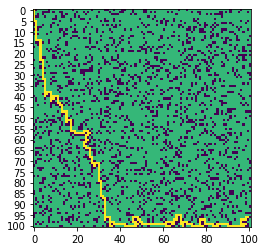

cannot reach destination
count 45


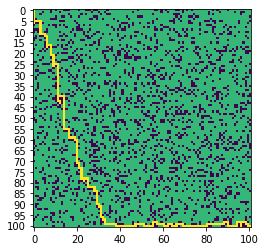

count 46


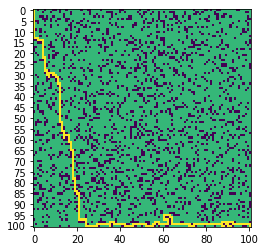

count 47


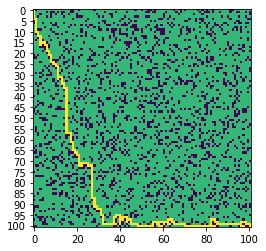

count 48
cannot reach destination


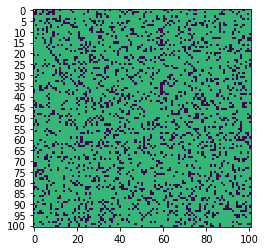

cannot reach destination
count 49


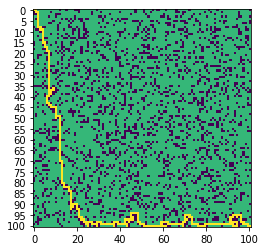

count 50
cannot reach destination


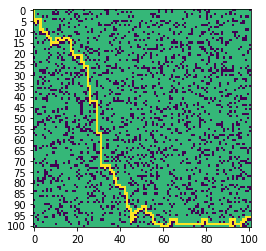

cannot reach destination
count 51


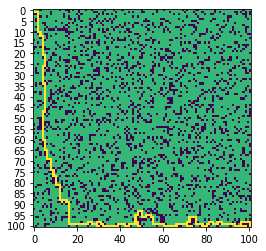

count 52


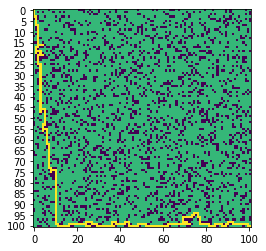

count 53


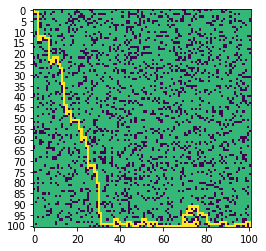

count 54
cannot reach destination


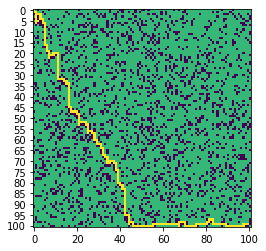

cannot reach destination
count 55


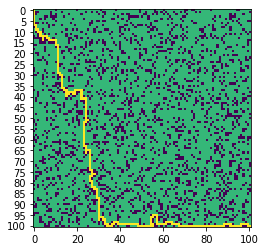

count 56


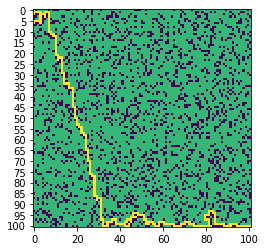

count 57


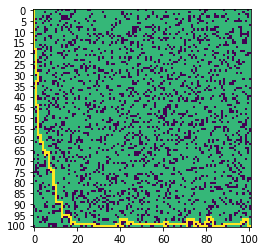

count 58


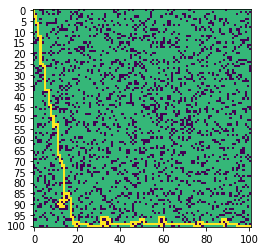

count 59


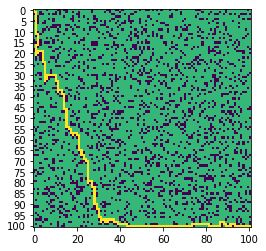

count 60


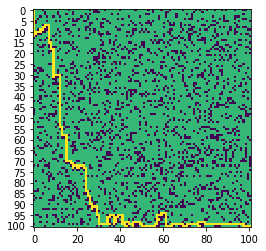

count 61
cannot reach destination


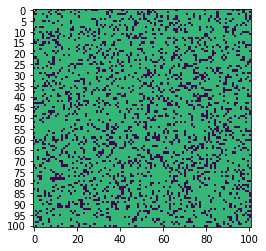

cannot reach destination
count 62


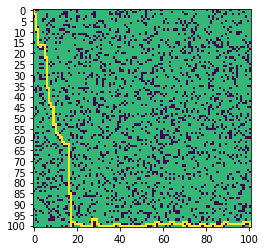

count 63


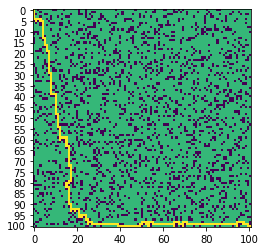

count 64


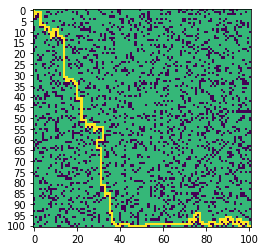

count 65
cannot reach destination


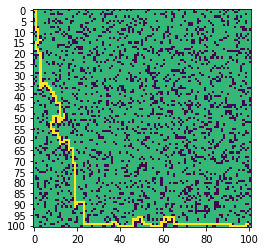

cannot reach destination
count 66


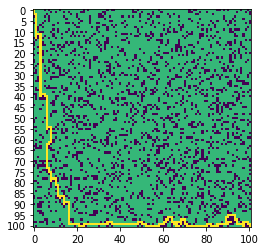

count 67


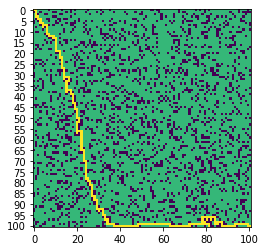

count 68


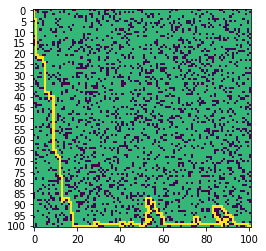

count 69


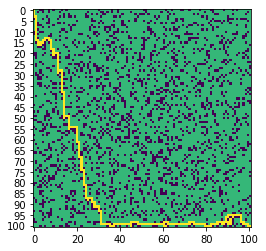

count 70


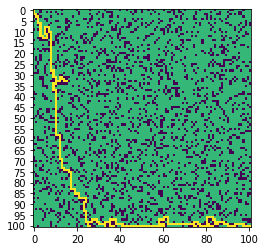

count 71


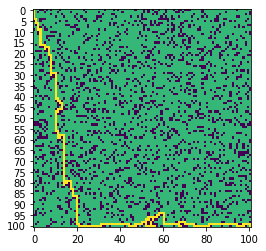

count 72


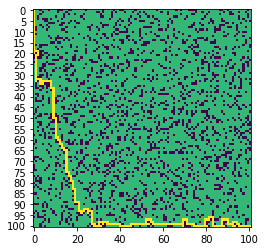

count 73


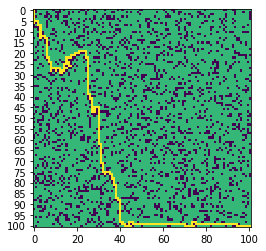

count 74


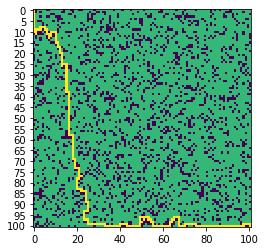

count 75


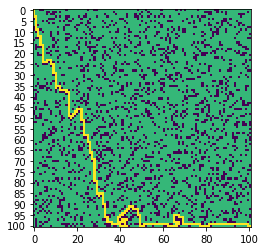

count 76


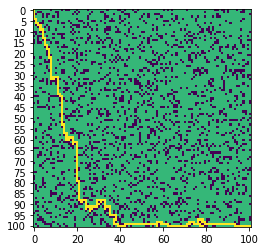

count 77


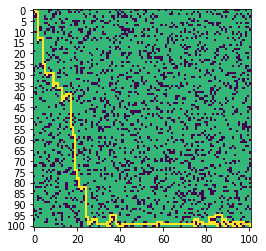

count 78


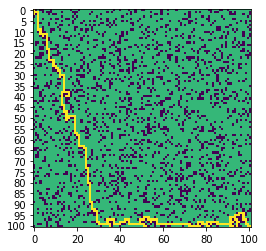

count 79


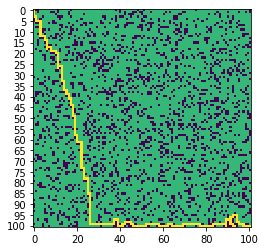

count 80


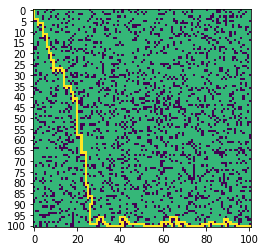

count 81
cannot reach destination


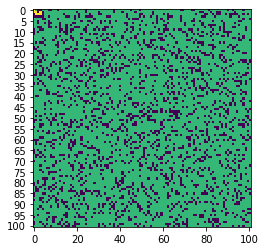

cannot reach destination
count 82
cannot reach destination


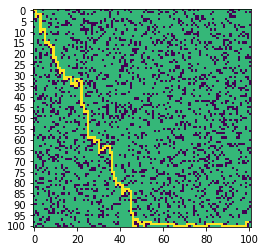

cannot reach destination
count 83
cannot reach destination


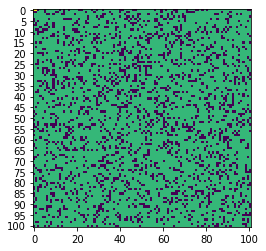

cannot reach destination
count 84


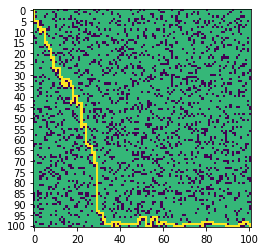

count 85
cannot reach destination


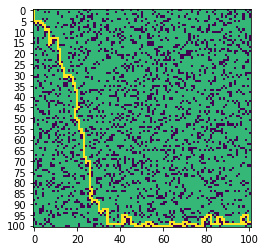

cannot reach destination
count 86


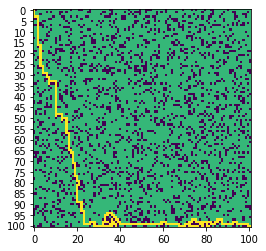

count 87


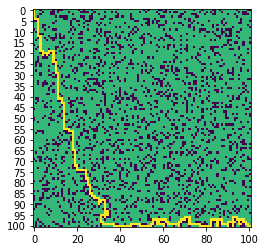

count 88


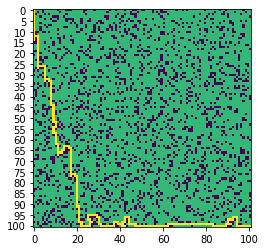

count 89


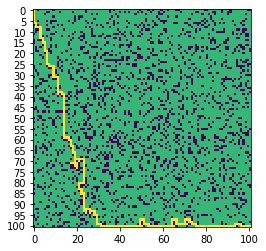

count 90


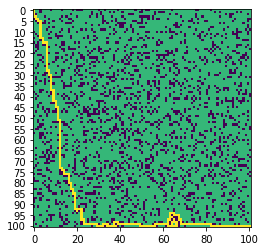

count 91
cannot reach destination


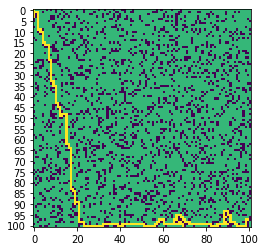

cannot reach destination
count 92


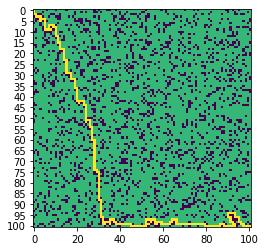

count 93


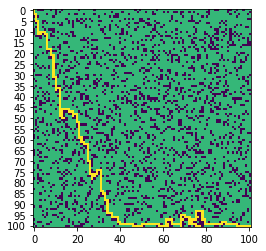

count 94


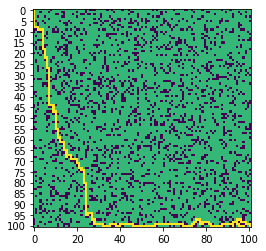

count 95


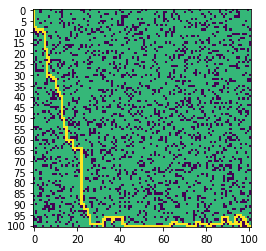

count 96


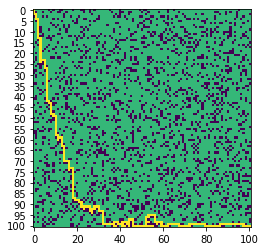

count 97


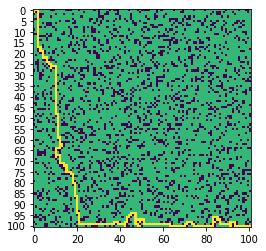

count 98


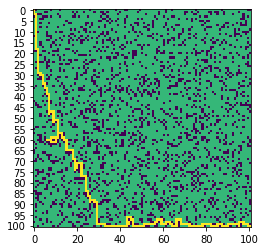

count 99


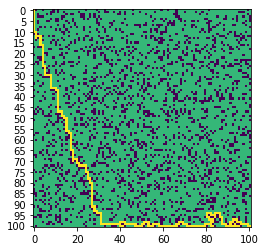

count 100
cannot reach destination


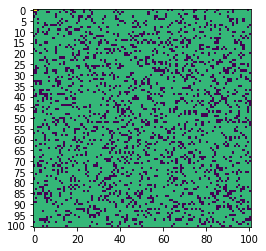

cannot reach destination
expanded_nodes_length_1 =  [160960, 113565, 117343, 132158, 116167, 143743, 144108, 165339, 178285, 191099, 140091, 107100, 112183, 126629, 125733, 116138, 209280, 174486, 127744, 142816, 128009, 151099, 135601, 187819, 153023, 204392, 150476, 140093, 146451, 197739, 143269, 125658, 133706, 165652, 98672, 132658, 119625, 136020, 121526, 149926, 138863, 107852, 107694, 170388, 191352, 180007, 70038, 101626, 156608, 124923, 103578, 117073, 211401, 70200, 172821, 95448, 133300, 195244, 133616, 104454, 186135, 147510, 166831, 137626, 112021, 169382, 155851, 135603, 168827, 120123, 146405, 96961, 150673, 120042, 185555, 174106, 128677, 140308, 109248, 122730, 130465, 136641]
expanded_nodes_length_2 =  [169672, 194287, 212747, 202792, 234218, 222373, 215114, 272318, 224150, 229957, 240055, 281062, 219792, 209375, 242395, 242309, 237515, 330048, 175980, 247089, 181510, 180270, 265682, 237102, 239938, 270193, 197885, 287362, 220436, 271996, 367510, 217722, 258039, 1485

/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


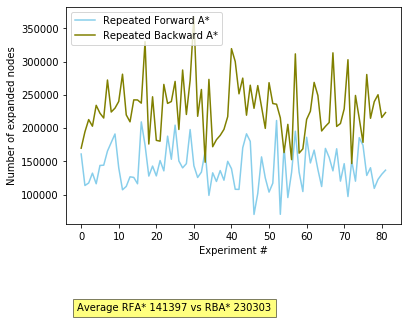

RFA* 141397 vs RBA* 230303


In [10]:
#  forward a* vs backward A*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,100):
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size

#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()    
    adaptive = False
    
#     print(maze)
    print( 'count', k+1)
#     print('start', source_i, source_j, 'end',destination_i, destination_j, 'count', k+1)
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
#     print(maze)
    showMaze(maze,1)


    open_list = MinHeap()
#     print(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = True
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = False
    total_expanded_nodes, can_reach = AStarSearchBackwards(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)


# print('start', nodes[source_i][source_j].x, nodes[source_i][source_j].y, 'end',nodes[destination_i][destination_j].x,nodes[destination_i][destination_j].y)
print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
print('expanded_nodes_length_2 = ',expanded_nodes_length_2)


RFA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
RBA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))


import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Backward A*')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')
plt.legend(['Repeated Forward A*', 'Repeated Backward A*'], loc='upper left')

txt_string = 'Average RFA* ' + str(RFA) +' vs RBA* ' + str(RBA)

plt.text(-1, -75000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()
print('RFA*', RFA, 'vs RBA*', RBA )

In [11]:
maze[100][100]


1